In [84]:
import pandas as pd 
import numpy as np    

import matplotlib.pyplot as plt 
import seaborn as sns 

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import accuracy_score

In [25]:
df = pd.read_csv('./Datasets/Titanic.csv',  usecols=['Survived', 'Age', 'Fare'])

In [38]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [39]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [40]:
# fill the missing values in the age columns. 
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [41]:
data = df.iloc[ : , 1:]
target = df.iloc[ : , 0]

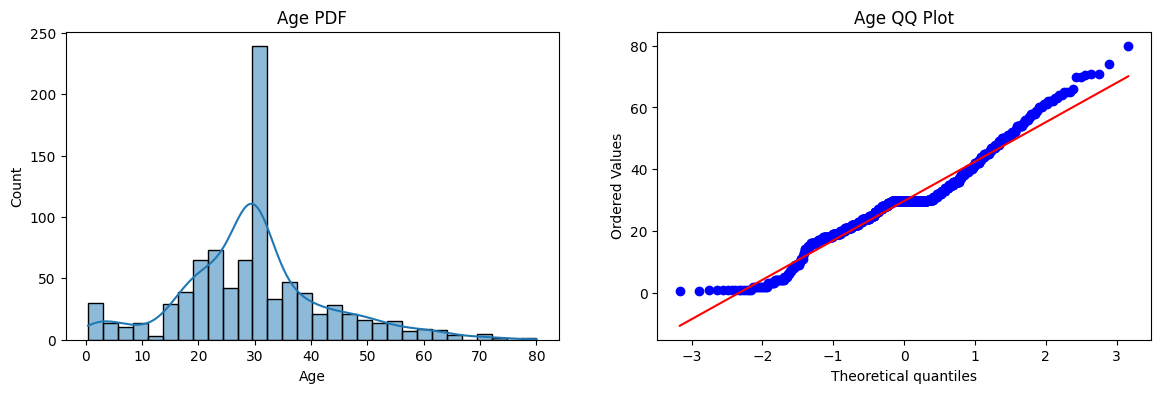

In [55]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.histplot(df['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(df['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')
plt.show()

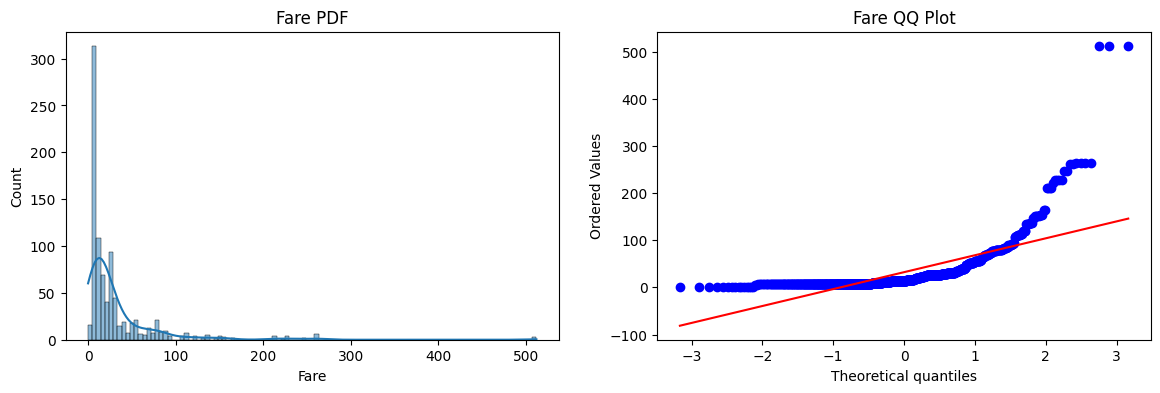

In [56]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.histplot(df['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(df['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [88]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [89]:
lr = LogisticRegression() 
clf = DecisionTreeClassifier()

lr_model = lr.fit(x_train, y_train)
clf_model = clf.fit(x_train, y_train)

lr_pred = lr_model.predict(x_test) 
clf_pred = clf_model.predict(x_test)


print("Test Accuracy LR:", accuracy_score(y_test, lr_pred))
print("Test Accuracy DTC:", accuracy_score(y_test, clf_pred))

Test Accuracy LR: 0.6480446927374302
Test Accuracy DTC: 0.6536312849162011


In [90]:
log_transformer = FunctionTransformer(np.log1p, validate=True) 

x_train_transformed = log_transformer.fit_transform(x_train)
x_test_transformed = log_transformer.fit_transform(x_test)

In [91]:
lr = LogisticRegression() 
clf = DecisionTreeClassifier()

lr_model = lr.fit(x_train_transformed, y_train)
clf_model = clf.fit(x_train_transformed, y_train)

lr_pred = lr_model.predict(x_test_transformed) 
clf_pred = clf_model.predict(x_test_transformed)


print("Test Accuracy LR:", accuracy_score(y_test, lr_pred))
print("Test Accuracy DTC:", accuracy_score(y_test, clf_pred))

Test Accuracy LR: 0.6815642458100558
Test Accuracy DTC: 0.6703910614525139
